## BANK CREDIT RISK EXTENSIVE EDA

### PROBLEM STATEMENT:

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected and identifying consumers who might default on the loan.

This EDA aims at identifying key driving factors(consumer attributes and loan attributes) which contribute to defaulting a loan by a consumer.

In [215]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [216]:
#import the req libraries for working on datasets and plotting visualizations

import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
# To display all rows and columns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', 1000)

### DATA  UNDERSTANDING AND PREPARATION

In [218]:
#Reading the required datasets Application_data(details of consumer applying for a new loan) 
#and previous_application(loan details and customer details of existing or closed loans)

#curr_appl = pd.read_csv(r"C:\Users\admin\Downloads\application_data.csv")
#prev_appl= pd.read_csv(r"C:\Users\admin\Downloads\previous_application.csv")
curr_appl=pd.read_csv(r"E:\Silpa_IITB\Upgrad_Python\EDA Case Study files\application_data.csv")
prev_appl=pd.read_csv(r"E:\Silpa_IITB\Upgrad_Python\EDA Case Study files\previous_application.csv")


In [219]:
# Display first five rows using head() function
curr_appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [220]:
# Check the shape(number of rows and columns) of the dataframe 

print("(Rows,Columns) :",curr_appl.shape)

(Rows,Columns) : (307511, 122)


In [221]:
# Inspecting the data types and missing values column wise

curr_appl.info(max_cols=curr_appl.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [222]:
#  Displaying Null Values count and their percentage column wise   
#  shown as a dataframe null_values in descending order

null_values=pd.DataFrame(curr_appl.isna().sum(),columns=["Null Count"])
null_values["Null Percentage"]= round( (null_values["Null Count"]*100/curr_appl.shape[0]), 2)
null_values.sort_values("Null Percentage",ascending=False)

,Null Count,Null Percentage
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


In [223]:
# Creating a dataframe curr_appl2 by dropping the attributes where null % >= 45

non_null_cols=null_values[null_values["Null Percentage"] < 45].index.tolist()
curr_appl2= curr_appl[non_null_cols]
#checking the first five rows of curr_appl2
curr_appl2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
# Checking for remaining null values % in the new data frame curr_appl2 column wise in descending order

null_values=pd.DataFrame(curr_appl2.isna().sum(),columns=["Null Count"])
null_values["Null Percentage"]= round( (null_values["Null Count"]*100/curr_appl.shape[0]), 2)
null_values.sort_values("Null Percentage",ascending=False)

,Null Count,Null Percentage
OCCUPATION_TYPE,96391,31.35
EXT_SOURCE_3,60965,19.83
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.50
NAME_TYPE_SUITE,1292,0.42
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33


#### MISSING VALUES

In [225]:
# Checking the missing values in the derived dataset curr_appl2

curr_appl2.isna().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
NAME_INCOME_TYPE                   0
FLAG_OWN_REALTY                    0
TARGET                             0
FLAG_EMAIL                         0
FLAG_PHONE                         0
FLAG_CONT_MOBILE                   0
NAME_CONTRACT_TYPE                 0
FLAG_WORK_PHONE                    0
FLAG_EMP_PHONE                     0
F

#### MISSING VALUES OCCUPATION_TYPE

In [226]:
# In order to prevent data loss and also perform good analysis
# Dealing with the nan values in OCCUPATION_TYPE by categorising them into a new category "missing"

curr_appl2["OCCUPATION_TYPE"] = curr_appl2["OCCUPATION_TYPE"].fillna("missing")

# Checking the coversion done 
curr_appl2["OCCUPATION_TYPE"].value_counts(dropna=False)

#AS seen all the nan values are now categorised into a group called missing with value count 96391


missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### MISSING VALUES EXT_SOURCE_3

In [227]:
#Replacing missing values with median for the numerical column EXT_SOURCE_3.
curr_appl2.EXT_SOURCE_3.fillna(curr_appl2.EXT_SOURCE_3.median(),inplace=True)

# Checking after replacement
curr_appl2.EXT_SOURCE_3.isna().sum()

0

#### MISSING VALUES  AND DTYPE CONVERSION in CREDIT BUREAU ENQUIRY COLUMNS 

In [228]:
#imputing CREDIT BUREAU ENQUIRY related null values with 0 assuming there are no enquiries made. 
#Also, converting the columns type to int as the counts can not have float values
curr_appl2.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"]=curr_appl2.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(value=0).astype(int)
curr_appl2.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].isna().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [229]:
# checking the datatypes conversion to int

for x in curr_appl2.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"]:
    print(x,":",curr_appl2[x].dtype)

AMT_REQ_CREDIT_BUREAU_HOUR : int32
AMT_REQ_CREDIT_BUREAU_DAY : int32
AMT_REQ_CREDIT_BUREAU_WEEK : int32
AMT_REQ_CREDIT_BUREAU_MON : int32
AMT_REQ_CREDIT_BUREAU_QRT : int32
AMT_REQ_CREDIT_BUREAU_YEAR : int32


#### MIISING VALUES NAME_TYPE_SUITE.

In [230]:
#Replacing missing values with mode for the categorical column NAME_TYPE_SUITE.
curr_appl2.NAME_TYPE_SUITE.fillna(curr_appl2.NAME_TYPE_SUITE.mode()[0],inplace=True)

# Rechecking the column NAME_TYPE_SUITE for missing values after imputation 
curr_appl2.NAME_TYPE_SUITE.isna().sum()

0

#### MISSING VALUE AND DATA TYPE CONVERSION SOCIAL SURROUNDIGS (OBS)

In [231]:
#Imputing Client's social surroundings observation counts related null values with 0 assuming there are no observations made. 
#Also, converting the columns type to int as the counts can not have float values
curr_appl2.loc[:,"OBS_30_CNT_SOCIAL_CIRCLE":"DEF_60_CNT_SOCIAL_CIRCLE"]=curr_appl2.loc[:,"OBS_30_CNT_SOCIAL_CIRCLE":"DEF_60_CNT_SOCIAL_CIRCLE"].fillna(value=0).astype(int)

# Checking for null values fater the necessary changes
curr_appl2.loc[:,"OBS_30_CNT_SOCIAL_CIRCLE":"DEF_60_CNT_SOCIAL_CIRCLE"].isna().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [232]:
# Cheking the datatype conversion

curr_appl2["CNT_CHILDREN"].dtype
obs_dtype=curr_appl2.loc[:,"OBS_30_CNT_SOCIAL_CIRCLE":"DEF_60_CNT_SOCIAL_CIRCLE"]
for x in obs_dtype:
    print("{} dtype :{}".format(x,curr_appl2[x].dtype))

OBS_30_CNT_SOCIAL_CIRCLE dtype :int32
DEF_30_CNT_SOCIAL_CIRCLE dtype :int32
OBS_60_CNT_SOCIAL_CIRCLE dtype :int32
DEF_60_CNT_SOCIAL_CIRCLE dtype :int32


#### MISSING VALUES EXT_SOURCE_2

In [233]:
#Replacing missing values with median for the numerical column EXT_SOURCE_2 as the mean is far.
curr_appl2.EXT_SOURCE_2.fillna(curr_appl2.EXT_SOURCE_3.median(),inplace=True)

# Displaying the changes
curr_appl2.EXT_SOURCE_2.isna().sum()

0

#### MISSING VALUES AMT_GOODS_PRICE

In [234]:
#Replace missing values with median for the numeric column AMT_GOODS_PRICE as the mean value is far 
curr_appl2.AMT_GOODS_PRICE.fillna((curr_appl2.AMT_GOODS_PRICE.median()), inplace=True)

#Check the null values in the AMT_GOODS_PRICE after imputing with median
curr_appl2.AMT_GOODS_PRICE.isnull().sum()

0

#### MISSING VALUES AMT_ANNUITY

In [235]:
# Imputing missing values with mean for the numeric column AMT_ANNUITY as there is a huge difference between the max and 75%
curr_appl2.AMT_ANNUITY.fillna((curr_appl2.AMT_ANNUITY.mean()), inplace=True)

#Check the null values in the AMT_ANUITY after imputing with mean
curr_appl2.AMT_ANNUITY.isna().sum()

0

#### MISSING VALUES AND DTYPE CONVERSION CNT_FAM_MEMBERS

In [236]:
#Imputing CNT_FAM_MEMBERS with 1 as all other family details are missing or 0. 
#Also, the counts cannot be float values. Hence, converting the data type to int
curr_appl2.CNT_FAM_MEMBERS=curr_appl2.CNT_FAM_MEMBERS.fillna(value=1).astype(int)

#Check the null values and DTYPE in the CNT_FAM_MEMBERS after necessary changes
print("MIISING VALUES:",curr_appl2.CNT_FAM_MEMBERS.isna().sum())
print("DTYPE:",curr_appl2.CNT_FAM_MEMBERS.dtype)

MIISING VALUES: 0
DTYPE: int32


#### MISSING VALUES AND DTYPE CONVERSION DAYS_LAST_PHONE_CHANGE

In [237]:
#Imputing DAYS_LAST_PHONE_CHANGE with 0 as the mean and median are so far 
#and change the data type of the column to int as days can not be floats

curr_appl2.DAYS_LAST_PHONE_CHANGE=curr_appl2.DAYS_LAST_PHONE_CHANGE.fillna(value=0).abs().astype(int)

In [238]:
#Check the null values in the DAYS_LAST_PHONE_CHANGE after imputing with mean
print("MIISING VALUES:",curr_appl2.DAYS_LAST_PHONE_CHANGE.isna().sum())
# check the dtypes
print("DTYPE:",curr_appl2.DAYS_LAST_PHONE_CHANGE.dtype)
# Checking the negative value conversion
curr_appl2["DAYS_LAST_PHONE_CHANGE"].head()

MIISING VALUES: 0
DTYPE: int32


0    1134
1     828
2     815
3     617
4    1106
Name: DAYS_LAST_PHONE_CHANGE, dtype: int32

#### DTYPE  AND NEGATIVE VALUE  DAYS CHANGE RELATED COLUMNS

In [239]:
# The columns DAYS_BIRTH, DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH have values in negative.
# Changing these to positive values by using pd.series.abs() and converting them into integers from floats
curr_appl2.loc[:,"DAYS_BIRTH":"DAYS_ID_PUBLISH"]=curr_appl2.loc[:,"DAYS_BIRTH":"DAYS_ID_PUBLISH"].abs().astype(int)

#Check the top 5 records after conversion
curr_appl2.loc[:,"DAYS_BIRTH":"DAYS_ID_PUBLISH"].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648,2120
1,16765,1188,1186,291
2,19046,225,4260,2531
3,19005,3039,9833,2437
4,19932,3038,4311,3458


In [240]:
# checking the dtypes after changes:
for x in curr_appl2.loc[:,"DAYS_BIRTH":"DAYS_ID_PUBLISH"]:
        print(x,curr_appl2[x].dtype)

DAYS_BIRTH int32
DAYS_EMPLOYED int32
DAYS_REGISTRATION int32
DAYS_ID_PUBLISH int32


#### DROPPING THE RECORDS WTH "XNA" IN CODE_GENDER



In [241]:
#Checking Gender value counts
curr_appl2.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [242]:
# The null value count in the column is 0 but "XNA" values clearly implies missing values.
# As the percentage of these "XNA" value is quite low imputing them with mode

curr_appl2.CODE_GENDER.replace('XNA',curr_appl2.CODE_GENDER.mode()[0], inplace = True)

# Displaying the changes made
curr_appl2.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### CHECKING FOR DUPLICATES

In [243]:
#Get all the Object data type columns and thier unique values to identify if there are any duplicates
obj_cols=[col for col in curr_appl2.columns if curr_appl2[col].dtypes=='O']
for col in obj_cols:
    print(col,":\n",curr_appl2[col].unique(),"\n")

NAME_CONTRACT_TYPE :
 ['Cash loans' 'Revolving loans'] 

CODE_GENDER :
 ['M' 'F'] 

FLAG_OWN_CAR :
 ['N' 'Y'] 

FLAG_OWN_REALTY :
 ['Y' 'N'] 

NAME_TYPE_SUITE :
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people'] 

NAME_INCOME_TYPE :
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 

NAME_EDUCATION_TYPE :
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 

NAME_FAMILY_STATUS :
 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown'] 

NAME_HOUSING_TYPE :
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment'] 

OCCUPATION_TYPE :
 ['Laborers' 'Core staff' 'Accountants' 'Managers' 'missing' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'

#### OBSERVATION :
There are no duplicates in the object type data

### DATA CLEANING AND MANIPULATION

In [244]:
# Checking the summary of numerical columns of the newly derived dataset curr_appl2
numeric_cols=[col for col in curr_appl2.columns if curr_appl2[col].dtypes!='O']
curr_appl2[numeric_cols].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383163e+05,0.020868,16036.995067,67724.742149,4986.120327,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152658,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.144375e-01,0.515695,1.417523,0.142944,1.400626,0.099717,962.855657,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692890e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910683,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908575e-01,0.174736,2.398395,0.446033,2.377224,0.361735,826.808966,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.170000e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.0000

#### STANDARDISING THE VALUES TO YEARS :
Converting Columns pertaining to DAYS_BIRTH to years

In [245]:
# The columns DAYS_BIRTH, DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH :converting to years

new_col_list=["CLIENT AGE(IN YRS)","EMPLOYMENT AGE(IN YRS)","REGISTRATION AGE(IN YRS)","IDENTITY AGE(IN YRS)","CLIENT PHONE AGE(IN YRS)"]
col_to_edit=curr_appl2[["DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]
for x,y in zip(new_col_list,col_to_edit) :
    curr_appl2[x]=curr_appl2[y].apply(lambda x : int(x/365))
    curr_appl2.drop(y,axis=1,inplace=True)

# Checking the new columns data:

curr_appl2[["CLIENT AGE(IN YRS)","EMPLOYMENT AGE(IN YRS)","REGISTRATION AGE(IN YRS)","IDENTITY AGE(IN YRS)","CLIENT PHONE AGE(IN YRS)"]].describe()

,CLIENT AGE(IN YRS),EMPLOYMENT AGE(IN YRS),REGISTRATION AGE(IN YRS),IDENTITY AGE(IN YRS),CLIENT PHONE AGE(IN YRS)
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.435968,185.021521,13.168683,7.713474,2.225107
std,11.954593,381.972190,9.646841,4.134515,2.193678
min,20.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,5.000000,4.000000,0.000000
50%,43.000000,6.000000,12.000000,8.000000,2.000000
75%,53.000000,15.000000,20.000000,11.000000,4.000000
max,69.000000,1000.000000,67.000000,19.000000,11.000000


### OUTLIERS

#### CONVERTING AMOUNT RELATED COLUMNS INTO THOUSANDS

In [246]:
# For a better visualization storing the Amount related values in thousands in new columns

new_col_list=["INCOME(IN K)","LOAN CREDIT(IN K)","LOAN ANNUITY(IN K)","GOODS PRICE(IN K)"]
col_to_edit=curr_appl2[["AMT_INCOME_TOTAL", "AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]]
for x,y in zip(new_col_list,col_to_edit) :
    curr_appl2[x]=round(curr_appl2[y]/1000,2)
    curr_appl2.drop(y,axis=1,inplace=True)

# Checking the new columns data:
curr_appl2[["INCOME(IN K)","LOAN CREDIT(IN K)","LOAN ANNUITY(IN K)","GOODS PRICE(IN K)"]].describe()

,INCOME(IN K),LOAN CREDIT(IN K),LOAN ANNUITY(IN K),GOODS PRICE(IN K)
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,168.797919,599.026043,27.108616,538.316294
std,237.123147,402.490758,14.493390,369.288982
min,25.650000,45.000000,1.620000,40.500000
25%,112.500000,270.000000,16.520000,238.500000
50%,147.150000,513.530000,24.900000,450.000000
75%,202.500000,808.650000,34.600000,679.500000
max,117000.000000,4050.000000,258.030000,4050.000000


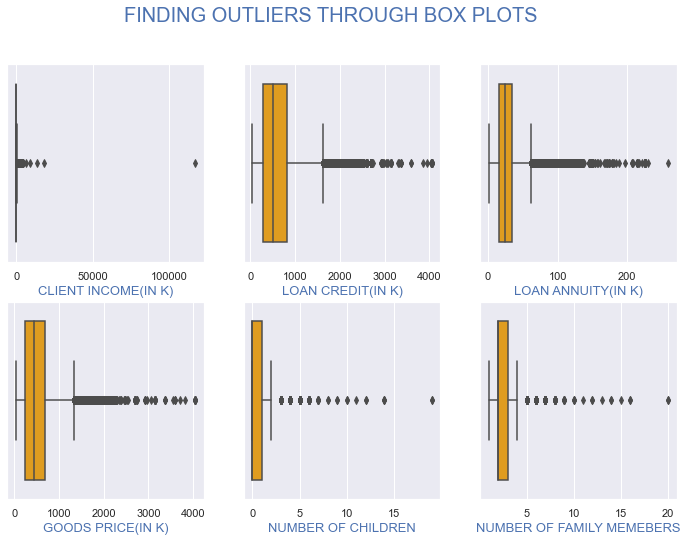

In [247]:
# Plotting the variables AMT_GOODS_PRICE,INCOME(IN K),LOAN CREDIT(IN K),LOAN ANNUITY(IN K),GOODS PRICE(IN K),
# NUMBER OF CHILDREN ,NUMBER OF FAMILY MEMEBERS in a single subplot using boxplots for outlier check.

fig, axes = plt.subplots(2, 3, figsize=(12, 8))


fig.suptitle('FINDING OUTLIERS THROUGH BOX PLOTS',fontsize=20,color="b")

sns.boxplot(ax=axes[0, 0], data=curr_appl2, x='INCOME(IN K)',color="orange")
axes[0][0].set_xlabel("CLIENT INCOME(IN K)",fontsize=13 ,color="b")
sns.boxplot(ax=axes[0, 1], data=curr_appl2, x='LOAN CREDIT(IN K)',color="orange",orient="v")
axes[0][1].set_xlabel("LOAN CREDIT(IN K)",fontsize=13 ,color="b")
sns.boxplot(ax=axes[0, 2], data=curr_appl2, x='LOAN ANNUITY(IN K)',color="orange",orient="v")
axes[0][2].set_xlabel("LOAN ANNUITY(IN K)",fontsize=13 ,color="b")
sns.boxplot(ax=axes[1, 0], data=curr_appl2, x='GOODS PRICE(IN K)',color="orange",orient="v")
axes[1][0].set_xlabel("GOODS PRICE(IN K)",fontsize=13 ,color="b")
sns.boxplot(ax=axes[1, 1], data=curr_appl2, x='CNT_CHILDREN',color="orange",orient="v")
axes[1][1].set_xlabel("NUMBER OF CHILDREN",fontsize=13 ,color="b")
sns.boxplot(ax=axes[1, 2], data=curr_appl2, x='CNT_FAM_MEMBERS',color="orange",orient="v")
axes[1][2].set_xlabel("NUMBER OF FAMILY MEMEBERS",fontsize=13 ,color="b")
plt.show()

In [248]:
# Looking through the summary of the above columns for a better insight

curr_appl2[['INCOME(IN K)','LOAN CREDIT(IN K)','LOAN ANNUITY(IN K)','GOODS PRICE(IN K)',
            'CNT_CHILDREN','CNT_FAM_MEMBERS']].describe()

,INCOME(IN K),LOAN CREDIT(IN K),LOAN ANNUITY(IN K),GOODS PRICE(IN K),CNT_CHILDREN,CNT_FAM_MEMBERS
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,168.797919,599.026043,27.108616,538.316294,0.417052,2.152658
std,237.123147,402.490758,14.493390,369.288982,0.722121,0.910683
min,25.650000,45.000000,1.620000,40.500000,0.000000,1.000000
25%,112.500000,270.000000,16.520000,238.500000,0.000000,2.000000
50%,147.150000,513.530000,24.900000,450.000000,0.000000,2.000000
75%,202.500000,808.650000,34.600000,679.500000,1.000000,3.000000
max,117000.000000,4050.000000,258.030000,4050.000000,19.000000,20.000000


#### OBSERVATIONS:
1.	The Box plots for all the columns Clearly show presence of possible outliers in the data. Further in the data summary also the max values lie high above the 75 % indicating the presence of outliers.
2.	For the column INCOME(IN K), the max value(117000) lies very high above the 75%(202) suggesting many outliers which could hinder statistical analysis. So, to save data as well as perform good statistical analysis it is best to impute these values with median or capping them to 99% before performing any analysis.
3.	The LOAN CREDIT(IN K),LOAN ANNUITY(IN K) columns also have high max values(4050 and 258 respectively) to their 75%(808 and 34 respectively).After further insights capping the data or imputing with mean would be apt.
4.	The summary CNT_CHILDREN show possible outlier values the maximum being 19. There can be clients with more children so for further insights the marital status, number of family members, their age can be looked into to see if these have to be deleted or imputed with the median.
5.	The same goes with CNT_FAM_MEMBERS, though many families range from 2 to 5 there are cases where the clients are living with parents and siblings in a joint family mounting up the count. So, after further insights these values could be imputed with the median of the data.




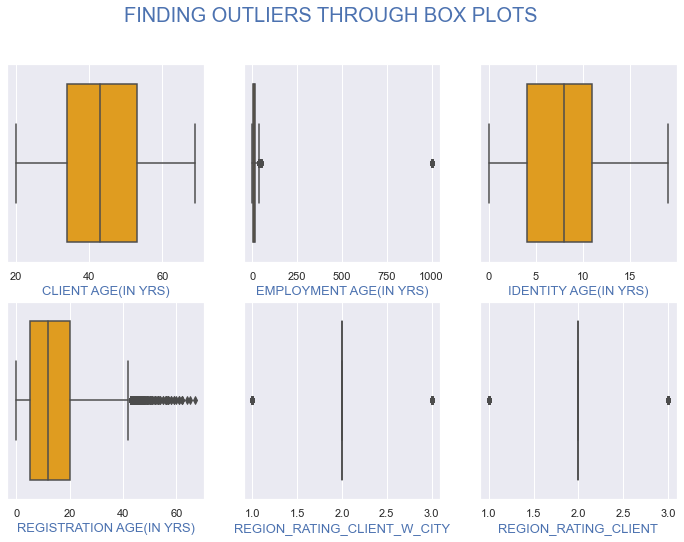

In [249]:
# looking through the remaining numeric columns "CLIENT AGE(IN YRS)","EMPLOYMENT AGE(IN YRS)",
#"REGISTRATION AGE(IN YRS)","IDENTITY AGE(IN YRS),REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT


fig, axes = plt.subplots(2, 3, figsize=(12, 8))


fig.suptitle('FINDING OUTLIERS THROUGH BOX PLOTS',fontsize=20,color="b")

sns.boxplot(ax=axes[0, 0], data=curr_appl2, x='CLIENT AGE(IN YRS)',color="orange")
axes[0][0].set_xlabel('CLIENT AGE(IN YRS)',fontsize=13 ,color="b")
sns.boxplot(ax=axes[0, 1], data=curr_appl2, x="EMPLOYMENT AGE(IN YRS)",color="orange")
axes[0][1].set_xlabel("EMPLOYMENT AGE(IN YRS)",fontsize=13 ,color="b")
sns.boxplot(ax=axes[0, 2], data=curr_appl2, x='IDENTITY AGE(IN YRS)',color="orange")
axes[0][2].set_xlabel('IDENTITY AGE(IN YRS)',fontsize=13 ,color="b")
sns.boxplot(ax=axes[1, 0], data=curr_appl2, x='REGISTRATION AGE(IN YRS)',color="orange")
axes[1][0].set_xlabel('REGISTRATION AGE(IN YRS)',fontsize=13 ,color="b")
sns.boxplot(ax=axes[1, 1], data=curr_appl2, x='REGION_RATING_CLIENT_W_CITY',color="orange")
axes[1][1].set_xlabel('REGION_RATING_CLIENT_W_CITY',fontsize=13 ,color="b")
sns.boxplot(ax=axes[1, 2], data=curr_appl2, x="REGION_RATING_CLIENT",color="orange")
axes[1][2].set_xlabel("REGION_RATING_CLIENT",fontsize=13 ,color="b")
plt.show()

In [250]:
# looking through the summary of the columns for more insights

curr_appl2[["CLIENT AGE(IN YRS)","EMPLOYMENT AGE(IN YRS)","REGISTRATION AGE(IN YRS)","IDENTITY AGE(IN YRS)",
            'REGION_RATING_CLIENT_W_CITY',"REGION_RATING_CLIENT"]].describe()

,CLIENT AGE(IN YRS),EMPLOYMENT AGE(IN YRS),REGISTRATION AGE(IN YRS),IDENTITY AGE(IN YRS),REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.435968,185.021521,13.168683,7.713474,2.031521,2.052463
std,11.954593,381.972190,9.646841,4.134515,0.502737,0.509034
min,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,34.000000,2.000000,5.000000,4.000000,2.000000,2.000000
50%,43.000000,6.000000,12.000000,8.000000,2.000000,2.000000
75%,53.000000,15.000000,20.000000,11.000000,2.000000,2.000000
max,69.000000,1000.000000,67.000000,19.000000,3.000000,3.000000


#### OBSERVATIONS:
1.	The box plots for CLIENT AGE(IN YRS) and IDENTIFY AGE(IN YRS) do not show any outliers. 
2.	The box plot for EMPLOYMENT AGE(IN YRS) clearly shows an outlier with age 1000 years. So, this can be excluded while doing the analysis by capping to 99%. 
3.	REGISTRATION AGE(IN YRS) shows some outliers. After further analysis these Outliers can be dealt by a. Capping them with required quartile b. Imputing with mean or median whichever is apt
4.	The box plots for REGION_RATING_CLIENT_W_CITY and REGION_RATIING_CLIENT show that there are only 3 values (1, 2 and 3). These values depend upon the their ratings numbered 1,2,and 3.So converting them to ordered categorical data will give better insights.




### BINNING OF COLUMNS FOR BETTER ANALYSIS

In [251]:
#Grouping the customers into four categories based on their ASSETS owned(House and car) namely:
 
# "House-Car" : having both house and car
# "House"     : having house only
# "Car"       : Having car only
# "No ASSETS" : No ASSETS(No house and no car) Grouping the ASSETS of customers into four categories into a new column "ASSETS":


def ASSETS(value):
    
    if value == "YY":
        return "House-Car"
    elif value == "NY":
        return "House"
    elif value =="YN":
        return "Car"
    else:
        return "No ASSETS"
    
    
curr_appl2["ASSETS"] = (curr_appl2["FLAG_OWN_CAR"]+curr_appl2["FLAG_OWN_REALTY"]).apply(ASSETS)
curr_appl2.ASSETS.value_counts()

House        140952
House-Car     72360
No ASSETS     61972
Car           32227
Name: ASSETS, dtype: int64

In [252]:
#Binning the continuous numerical column INCOME(IN K) into 4 groups using quartiles
curr_appl2.loc[:,'INCOME_GROUP']=pd.qcut(curr_appl2.loc[:,'INCOME(IN K)'],q=[0,0.25,0.50,0.75,0.99],
                                         labels=['Low','Medium','High',"Very High"])

#Check the count os rows after binning the INCOME(IN K) into different income groups
curr_appl2.INCOME_GROUP.value_counts()

Low          100578
High          82213
Very High     68524
Medium        53182
Name: INCOME_GROUP, dtype: int64

In [253]:
#Binning the continuous numerical column CLIENT AGE as per the min and max values
curr_appl2['AGE GROUP'] = pd.cut(x=curr_appl2['CLIENT AGE(IN YRS)'], bins=[20, 30, 40, 50, 60, 70])

#Check the count of records for different Age groups in the data frame
curr_appl2['AGE GROUP'].value_counts()

(30, 40]    83117
(40, 50]    74401
(50, 60]    67819
(20, 30]    52805
(60, 70]    29368
Name: AGE GROUP, dtype: int64

In [254]:
# Categorizing the "REGION_RATING_CLIENT_W_CITY" ,"REGION_RATIING_CLIENT" into three categories namely:
# tier 1: rating 1
# tier 2: rating 2
# tier 3: rating 3

def cat_tier(col):
    
        
        if col== 1:
            return "tier 1"
        elif col==2:
            return "tier 2"
        else:
            return "tier 3"

curr_appl2["REGION_RATING_CLIENT"]=curr_appl2["REGION_RATING_CLIENT"].apply(cat_tier)
curr_appl2["REGION_RATING_CLIENT_W_CITY"]=curr_appl2["REGION_RATING_CLIENT_W_CITY"].apply(cat_tier)



In [255]:
# Checking the conversion

print("REGION_RATING_CLIENT_W_CITY\n",curr_appl2["REGION_RATING_CLIENT_W_CITY"].value_counts())
print("\nREGION_RATING_CLIENT\n",curr_appl2["REGION_RATING_CLIENT"].value_counts())

REGION_RATING_CLIENT_W_CITY
 tier 2    229484
tier 3     43860
tier 1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

REGION_RATING_CLIENT
 tier 2    226984
tier 3     48330
tier 1     32197
Name: REGION_RATING_CLIENT, dtype: int64


### DATA ANALYSIS

#### DISTRIBUTION OF THE TARGET VARIABLE

The Target variable in the dataset has two categories represented with values 1 and 0,where:

1 Refers to clients with payment difficulties

0 Refers to all other clients

Lets see the distribution of target variable by plotting.

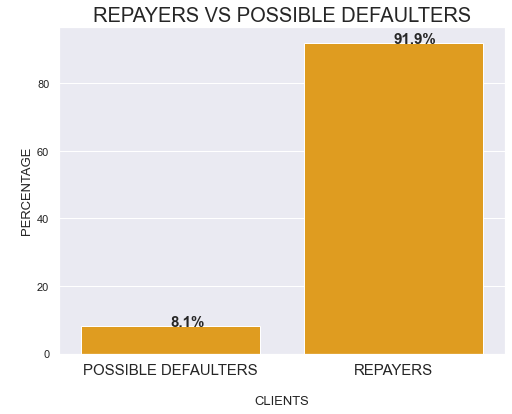

In [256]:
# Distribution of the TARGET variable to check the distribution of customers defaulting vs customers paying the loan
plt.figure(figsize=(8,6))
ax=sns.barplot(x=curr_appl2.TARGET, y=curr_appl2.TARGET.value_counts(normalize=True)*100,color="orange")
plt.title("REPAYERS VS POSSIBLE DEFAULTERS",fontsize=20,)
plt.xlabel("\nCLIENTS",fontsize=13)
plt.ylabel("\nPERCENTAGE",fontsize=13)

plt.xticks(ticks=range(2),labels=["POSSIBLE DEFAULTERS","REPAYERS"],fontsize=15)# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), fontsize=15,weight='bold' )
plt.show()

#### OBSERVATION
It is evident from the graph that almost 91.9% of clients are able to repay the loan on time. Clients who may be possible defaulters are very low. We have to further analyze and drill down the data in order to derive insights on what factors contribute towards a client defaulting on a loan.

### SUBSETTING THE DATASET

Subsetting the data set into two based on the target variable.By doing so we may observe the different trends or variable patterns on both the target categories at a time independently and arriving at the key driving factors contributing to a customer being a possible defaulter.

In [257]:
# Subsetting into Repayers (TARGET=0) as "Repayers" and Possible defaulters (TARGET = 1) as "Defaulters" 

Repayers= curr_appl2[curr_appl2.TARGET == 0]
Defaulters= curr_appl2[curr_appl2.TARGET == 1]

# Checking the first five rows of Repayers dataset
Repayers.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT AGE(IN YRS),EMPLOYMENT AGE(IN YRS),REGISTRATION AGE(IN YRS),IDENTITY AGE(IN YRS),CLIENT PHONE AGE(IN YRS),INCOME(IN K),LOAN CREDIT(IN K),LOAN ANNUITY(IN K),GOODS PRICE(IN K),ASSETS,INCOME_GROUP,AGE GROUP
1,100003,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2,tier 1,tier 1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,3,3,0,2,270.0,1293.50,35.70,1129.5,No ASSETS,Very High,"(40, 50]"
2,100004,0,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1,tier 2,tier 2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0,11,6,2,67.5,135.00,6.75,135.0,House-Car,Low,"(50, 60]"
3,100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2,tier 2,tier 2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,8,26,6,1,135.0,312.68,29.69,297.0,House,Medium,"(50, 60]"
4,100007,0,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1,tier 2,tier 2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,8,11,9,3,121.5,513.00,21.87,513.0,House,Medium,"(50, 60]"
5,100008,0,Cash loans,M,N,Y,0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,1,1,1,1,1,0,Laborers,2,tier 2,tier 2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,46,4,13,1,6,99.0,490.50,27.52,454.5,House,Low,"(40, 50]"


In [258]:
# Checking the first five rows of Defaulters dataset

Defaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT AGE(IN YRS),EMPLOYMENT AGE(IN YRS),REGISTRATION AGE(IN YRS),IDENTITY AGE(IN YRS),CLIENT PHONE AGE(IN YRS),INCOME(IN K),LOAN CREDIT(IN K),LOAN ANNUITY(IN K),GOODS PRICE(IN K),ASSETS,INCOME_GROUP,AGE GROUP
0,100002,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1,tier 2,tier 2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,1,9,5,3,202.5,406.60,24.70,351.0,House,High,"(20, 30]"
26,100031,1,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,1,1,0,1,0,0,Cooking staff,1,tier 3,tier 2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2,51,7,18,5,0,112.5,979.99,27.08,702.0,House,Low,"(50, 60]"
40,100047,1,Cash loans,M,N,Y,0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,1,1,0,1,0,0,Laborers,2,tier 2,tier 2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,4,47,3,3,2,2,202.5,1193.58,35.03,855.0,House,High,"(40, 50]"
42,100049,1,Cash loans,F,N,N,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,1,1,1,1,1,0,Sales staff,2,tier 3,tier 3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,36,9,0,12,4,135.0,288.87,16.26,238.5,No ASSETS,Medium,"(30, 40]"
81,100096,1,Cash loans,F,N,Y,0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,1,0,0,1,0,0,missing,2,tier 2,tier 2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,1000,14,11,0,81.0,252.00,14.59,252.0,House,Low,"(60, 70]"


#### UNIVARIATE ANYLYSIS NUMERICAL VARIABLES(REPAYERS VS DEFAULTERS)

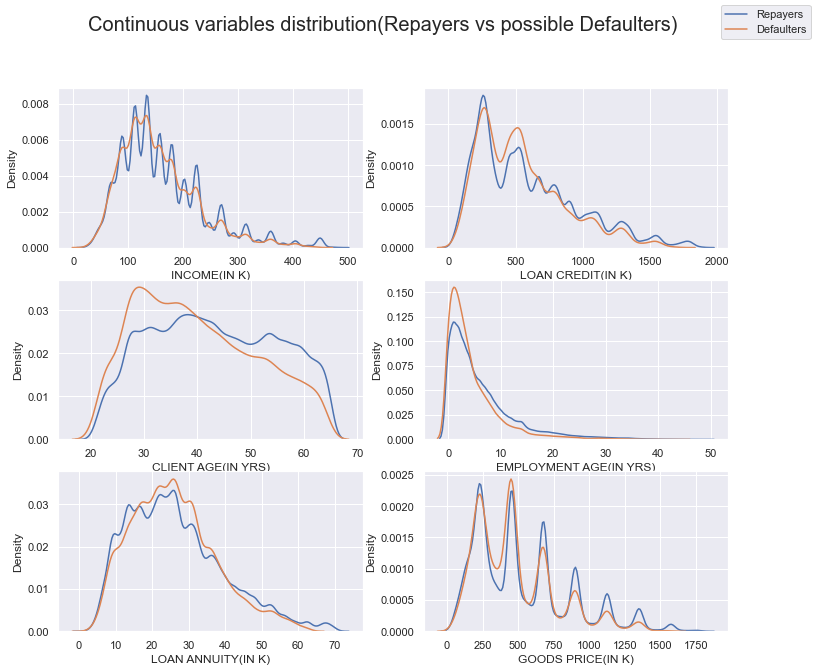

In [259]:
# Common function to plot distribution plots of all numerical columns "INCOME(IN K)","LOAN CREDIT(IN K)","CLIENT AGE(IN YRS)",
# "EMPLOYMENT AGE(IN YRS)","LOAN ANNUITY(IN K)","GOODS PRICE(IN K)"

def Repayers_cap(num):
    
    R=Repayers[Repayers[num] < np.quantile(Repayers[num],0.99)][num]
    return R
def Defaulters_cap(num):
    D=Defaulters[Defaulters[num] < np.quantile(Defaulters[num],0.99)][num]
    return D
fig=plt.figure(figsize=(12,10))
plt.suptitle("Continuous variables distribution(Repayers vs possible Defaulters)",fontsize=20)

# Running a for loop to plot the graphs at the same time
cnt=1
list1=["INCOME(IN K)","LOAN CREDIT(IN K)","CLIENT AGE(IN YRS)",
      "EMPLOYMENT AGE(IN YRS)","LOAN ANNUITY(IN K)","GOODS PRICE(IN K)"]
for x in list1:
    plt.subplot(3,2,cnt)

    sns.distplot(Repayers_cap(x),hist=False)
    sns.distplot(Defaulters_cap(x),hist=False)
    cnt+=1
fig.legend(labels=['Repayers','Defaulters'])
plt.show()




#### OBSERVATION:

All the parameters seem to follow a similar distribution except for age where younger people(20-40) have higher default rate than older people(50-60).

### BIVARIATE ANALYSIS FOR NUMERICAL COLUMNS

In [260]:
quant_i=Repayers["INCOME(IN K)"].quantile(.99)
quant_e=Repayers['EMPLOYMENT AGE(IN YRS)'].quantile(.99)
df1=Repayers[(Repayers["INCOME(IN K)"]<quant_i) & (Repayers["EMPLOYMENT AGE(IN YRS)"] <quant_e)]
df1["INCOME(IN K)"].describe()

count    227652.000000
mean        170.125431
std          78.601046
min          25.650000
25%         112.500000
50%         157.500000
75%         206.100000
max         483.300000
Name: INCOME(IN K), dtype: float64

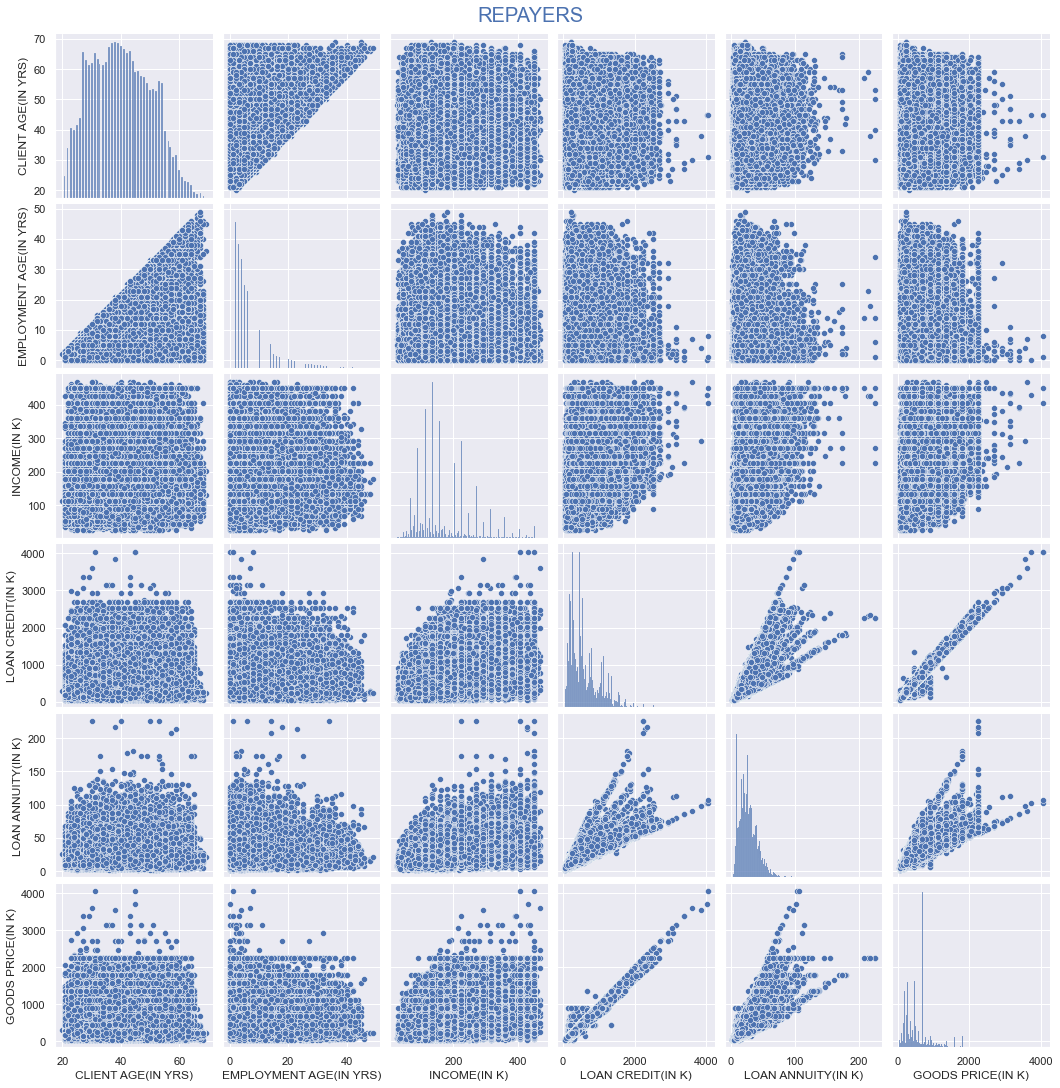

In [261]:
# Bivariate numerical analysis 'CLIENT AGE(IN YRS)','EMPLOYMENT AGE(IN YRS)','INCOME(IN K)',
#'LOAN CREDIT(IN K)','LOAN ANNUITY(IN K)','GOODS PRICE(IN K)' using Pairplot
quant_i=curr_appl2["INCOME(IN K)"].quantile(.99)
quant_e=curr_appl2["EMPLOYMENT AGE(IN YRS)"].quantile(.99)
cols_to_plot=['CLIENT AGE(IN YRS)','EMPLOYMENT AGE(IN YRS)','INCOME(IN K)','LOAN CREDIT(IN K)','LOAN ANNUITY(IN K)','GOODS PRICE(IN K)']

df_pairplotR=Repayers[(Repayers["INCOME(IN K)"]<quant_i) & (Repayers["EMPLOYMENT AGE(IN YRS)"] <quant_e)][cols_to_plot]
df_pairplotD=Defaulters[(Defaulters["INCOME(IN K)"]<quant_i) & (Defaulters["EMPLOYMENT AGE(IN YRS)"]< quant_e)][cols_to_plot]

# Pairplot of numeric variables in Repayers data set

R=sns.pairplot(df_pairplotR)
R.fig.suptitle("REPAYERS",y=1.01,size=20,c="b") # y= some height >1
plt.show()

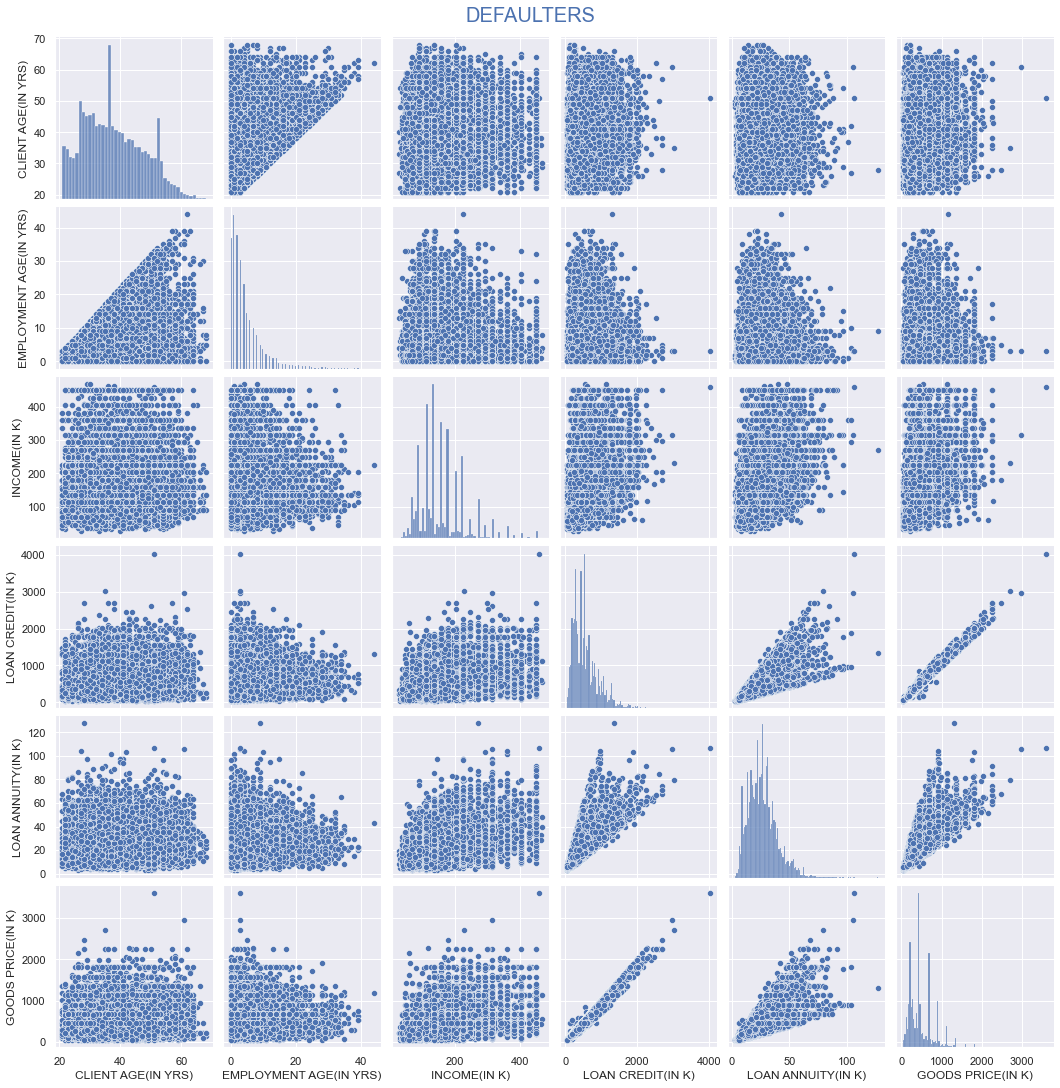

In [262]:
# Pairplot of numeric variables in Defaulters data set

D=sns.pairplot(df_pairplotD)
D.fig.suptitle("DEFAULTERS",y=1.01,size=20,c="b") # y= some height >1
plt.show()


### OBSERVATION

It is evident from the plot above that there is a strong linear relation between LOAN_CREDIT,GOODS_PRICE and LOAN_ANNUITY:
1.An increase in Goods price would increase the Loan Credit
2.As Loan credit increases the Annuity Amount also increases

Due to presence of outlier values high over the 75% quartile,the visualization of INCOME,EMPLOYMENT AGE are being binned to extremes .Capping the values to 99% will give a better output.

### CORRELATION MATRIX [ANALYSIS ] FOR NUMERICAL COLUMNS

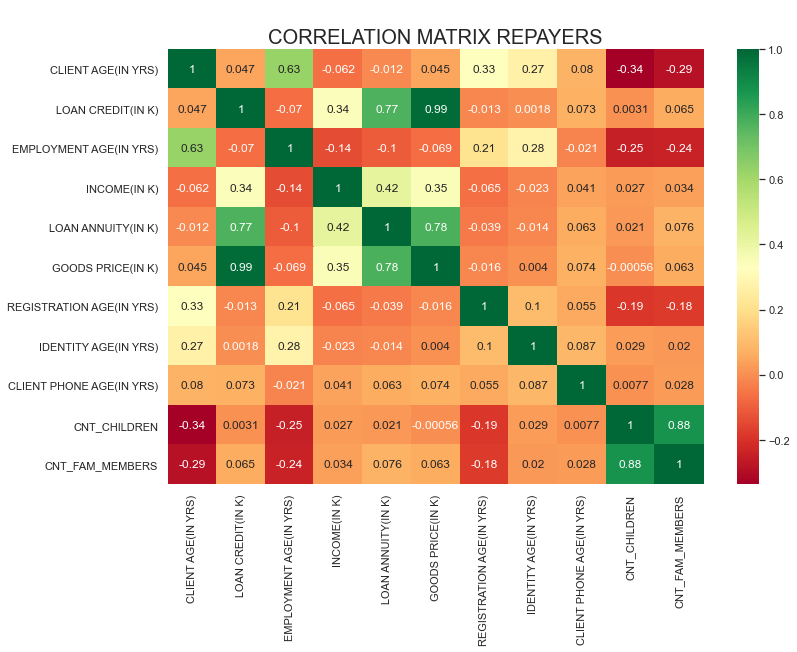

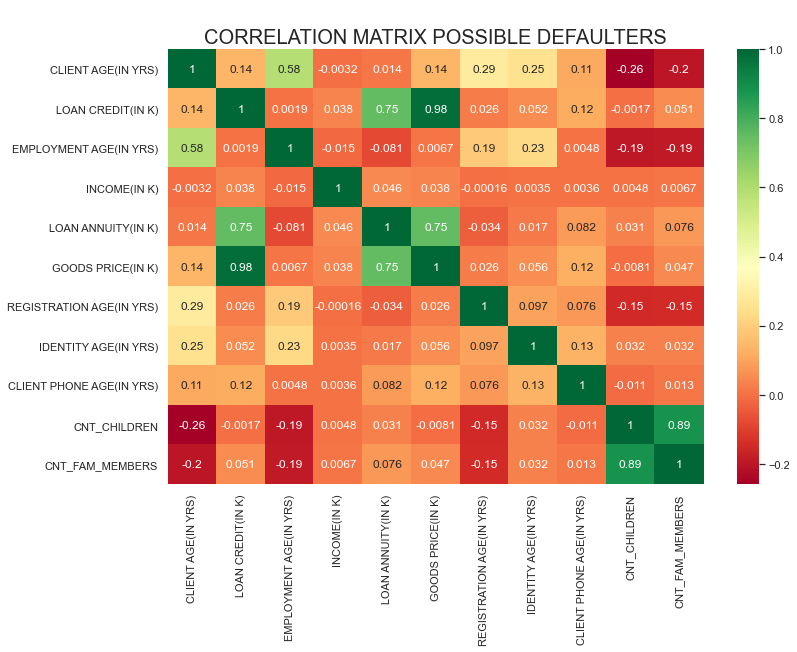

In [263]:
# Identifyng correlation by plotting correlation matrix of 'CLIENT AGE(IN YRS)','LOAN CREDIT(IN K)','EMPLOYMENT AGE(IN YRS)',"INCOME(IN K)",'LOAN ANNUITY(IN K)',
# 'GOODS PRICE(IN K)',"REGISTRATION AGE(IN YRS)","IDENTITY AGE(IN YRS)","CLIENT PHONE AGE(IN YRS)", "CNT_CHILDREN","CNT_FAM_MEMBERS"

corr_colsR=Repayers[['CLIENT AGE(IN YRS)','LOAN CREDIT(IN K)','EMPLOYMENT AGE(IN YRS)',"INCOME(IN K)",'LOAN ANNUITY(IN K)',
                     'GOODS PRICE(IN K)',"REGISTRATION AGE(IN YRS)","IDENTITY AGE(IN YRS)","CLIENT PHONE AGE(IN YRS)",
                    "CNT_CHILDREN","CNT_FAM_MEMBERS"]]
corr_colsD=Defaulters[['CLIENT AGE(IN YRS)','LOAN CREDIT(IN K)','EMPLOYMENT AGE(IN YRS)',"INCOME(IN K)",'LOAN ANNUITY(IN K)',
                     'GOODS PRICE(IN K)',"REGISTRATION AGE(IN YRS)","IDENTITY AGE(IN YRS)","CLIENT PHONE AGE(IN YRS)",
                    "CNT_CHILDREN","CNT_FAM_MEMBERS"]]

plt.figure(figsize=(12,8))

sns.heatmap(corr_colsR.corr(),cmap="RdYlGn",annot=True)
plt.title("\nCORRELATION MATRIX REPAYERS",fontsize=20)

plt.show()

plt.figure(figsize=(12,8))

sns.heatmap(corr_colsD.corr(),cmap="RdYlGn",annot=True)
plt.title("\nCORRELATION MATRIX POSSIBLE DEFAULTERS",fontsize=20)

plt.show()


### OBSERVATION:

As observed from the correlation matrix there is a strong correlation between Loan credit, Goods Price and Annuity in both the groups Repayers and Possible defaulters. For both groups strong correlation exists between number of children and number of family members indicating that the family count increases if children count increases. Also, as the client age increases the employment age increases.

In the Repayers group there exists a better correlation between the Client Income, Loan Credit, Loan Annuity and Goods price but that is not the case with Defaulters group where the correlation seems to be very weak when compared to Repayers. This seems to indicate that most defaulters are those who have been sanctioned higher loans compared to their income.


### TOP TEN CORRELATIONS IN REPAYERS:

1.GOODS PRICE(IN K) and LOAN CREDIT(0.99)

2.CNT_FAMILY_MEMEBERS and CNT_CHILDREN(0.88)

3.GOODS_PRICE AND LOAN ANNUITY (0.78)

4.LOAN ANNUITY AND LOAN CREDIT(0.77)

5.EMPLOYEMENT AGE AND CLIENT AGE(0.63)

4.LOAN ANNUITY AND INCOME(0.42)

5.GOODS PRICE AND INCOME (0.35)

6.INCOME AND LOAN CREDIT (0.34)

7.CLIENT AGE AND REGISTRATION AGE(0.33)

8.IDENTITY AGE AND EMPLOYEMENT AGE(0.28)

9.CLIENT AGE AND IDENTITY AGE(0.27)

10.REGISTRATION AGE AND EMPLOYEMENT AGE(0.21)


### TOP TEN CORRELATIONS IN DEFAULTERS:

1.GOODS PRICE(IN K) and LOAN CREDIT(0.98)

2.CNT_FAMILY_MEMEBERS and CNT_CHILDREN(0.89)

3.GOODS_PRICE AND LOAN ANNUITY (0.75)

4.LOAN ANNUITY AND LOAN CREDIT(0.75)

5.EMPLOYEMENT AGE AND CLIENT AGE(0.58)

6.CLIENT AGE AND REGISTRATION AGE(0.29)

7.CLIENT AGE AND IDENTITY AGE(0.25)

8.IDENTITY AGE AND EMPLOYEMENT AGE(0.23)

9.REGISTRATION AGE AND EMPLOYEMENT AGE(0.19)

10.CLIENT PHONE AGE AND IDENTITY AGE (0.13)

### UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS IN REPAYERS AND DEFAULTERS



In [264]:
# common function to run a count plot visualization on all categorical columns in Repayers and Defaulters datasets
def plot_count(var,title):
    
    sns.set(style="darkgrid")
    fig,ax=plt.subplots(1,2,figsize=(12,6))
    plt.suptitle("DISTRIBUTION of {} (REPAYER VS POSSIBLE DEFAULTERS)".format(title),size=20,c="indigo")
    
    sns.countplot(x=Repayers[var],data=Repayers,ax=ax[0],order = Repayers[var].value_counts().index)
    ax[0].set_title("\n\nREPAYERS",fontsize=15,c="indigo")
    
    

    sns.countplot(x=Defaulters[var],data=Defaulters,ax=ax[1],order = Repayers[var].value_counts().index)
    ax[1].set_title("\n\nPOSSIBLE DEFAULTERS",fontsize=15,c="indigo")
    
    res=plt.show()
    return res
    


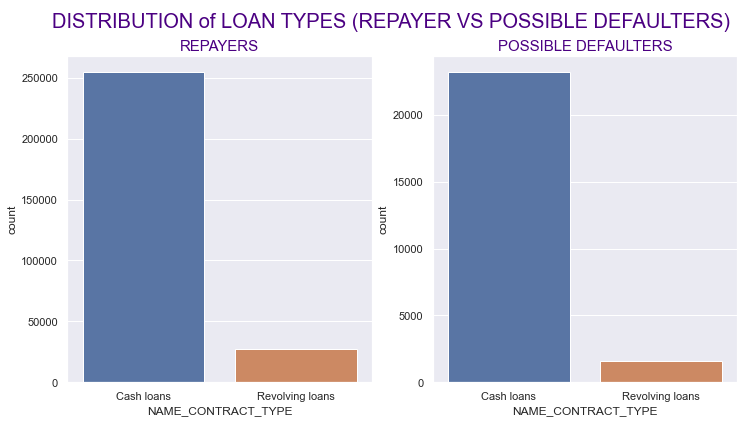

In [265]:
# Visualizing the type of credit and their distribution

plot_count('NAME_CONTRACT_TYPE',"LOAN TYPES")

### OBSERVATIONS:

There is large number of Clients taking Cash loans over Revolving loans. As seen from the plots, it can be inferred that Clients taking the Revolving loans are low risk and tend to default less..

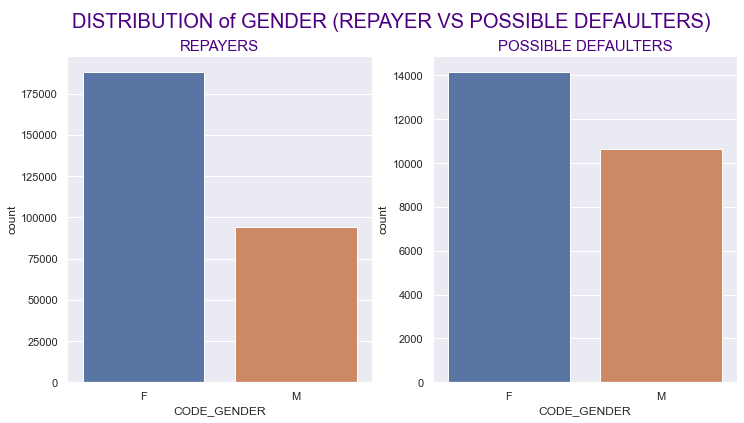

In [266]:
# UNIVARIATE ANALYSIS ON GENDER
plot_count('CODE_GENDER',"GENDER")

#### OBSERVATIONS:

More number of loans are being disbursed to Females than Males. Also, the bar sizes of Males clearly show a greater Default rate when compared to Females.

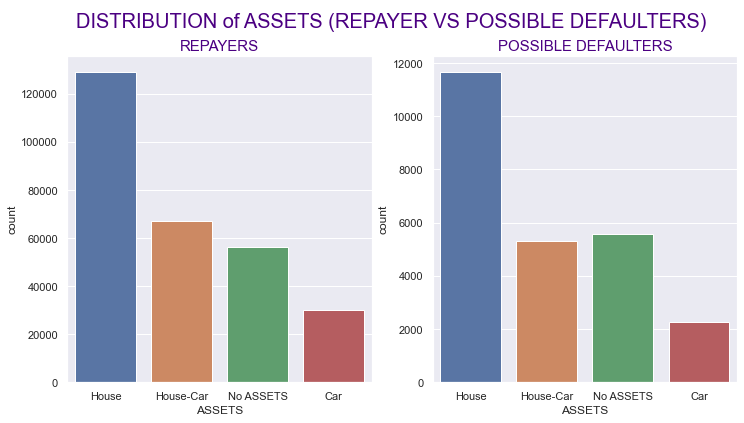

In [267]:
# Univariate analysis on Assets
plot_count('ASSETS',"ASSETS")

### OBSERVATION:

Large number of clients seems to own a house followed by Car and House, No Assets, only Car as Asset. Also, clients with No Assets seem to be facing repaying difficulties when compared to others. Those clients who own only car seems to be low risk with relatively lesser default percentage

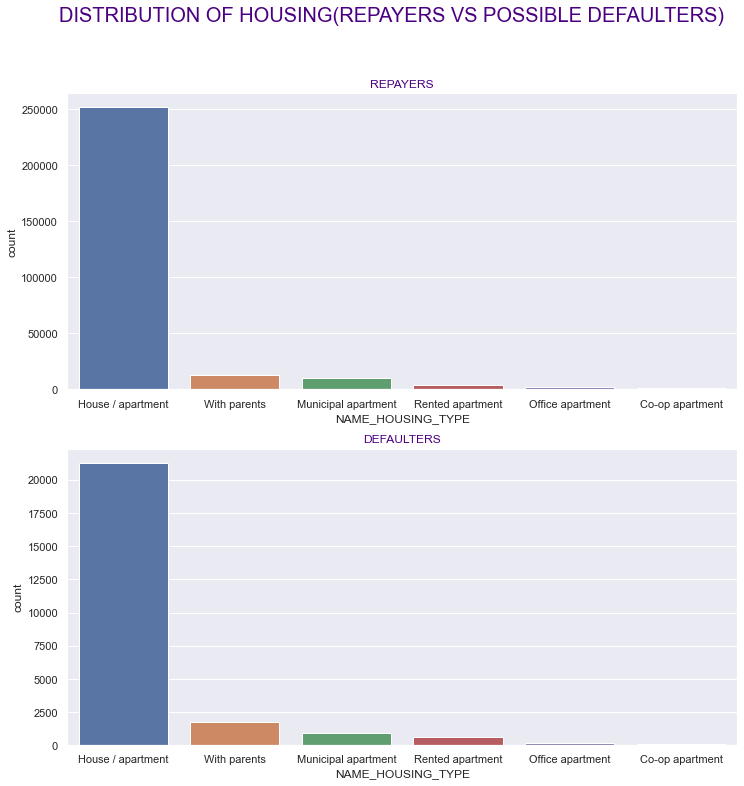

In [268]:
# UNIVARIATE ANAYSIS ON 'NAME_HOUSING_TYPE'
plt.figure(figsize=(12,12))
plt.suptitle("DISTRIBUTION OF HOUSING(REPAYERS VS POSSIBLE DEFAULTERS)",fontsize=20,color="indigo")

plt.subplot(2,1,1)
plt.title("REPAYERS",color="indigo")
sns.countplot(Repayers["NAME_HOUSING_TYPE"],order = Repayers["NAME_HOUSING_TYPE"].value_counts().index)
plt.subplot(2,1,2)
plt.title("\nDEFAULTERS",color="indigo")
sns.countplot(Defaulters['NAME_HOUSING_TYPE'],order = Repayers["NAME_HOUSING_TYPE"].value_counts().index)

plt.show()



#### OBSERVATION:
More people with House/Apartment are taking loans. As observed from bar lengths people with rented house and living with parents seem to be facing difficulty in repaying the loan when compared to other categories.

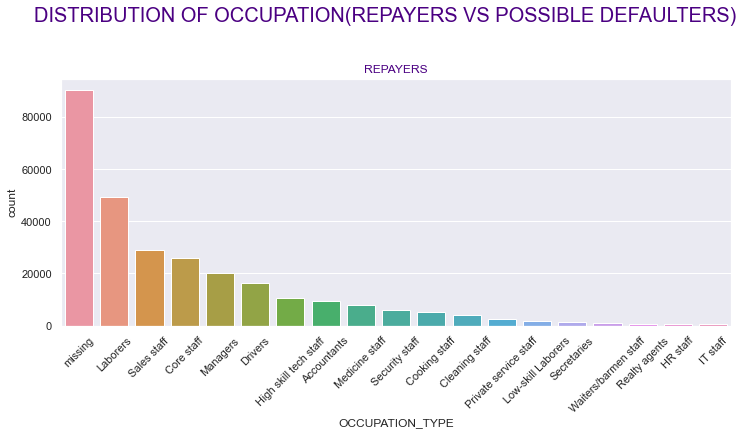

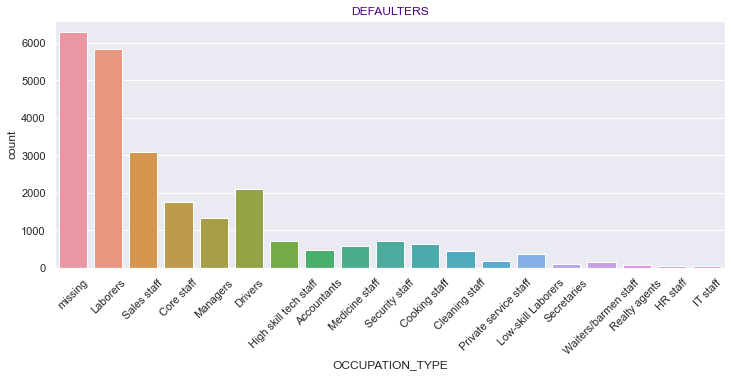

In [269]:
# UNIVARIATE ANALYSIS ON OCCUPATION
plt.figure(figsize=(12,10))
plt.suptitle("DISTRIBUTION OF OCCUPATION(REPAYERS VS POSSIBLE DEFAULTERS)",fontsize=20,color="indigo")
plt.subplot(2,1,1)
plt.title("REPAYERS",color="indigo")
sns.countplot(Repayers["OCCUPATION_TYPE"],order = Repayers["OCCUPATION_TYPE"].value_counts().index)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12,10))
plt.subplot(2,1,2)
plt.title("DEFAULTERS",color="indigo")
sns.countplot(Defaulters['OCCUPATION_TYPE'],order = Repayers["OCCUPATION_TYPE"].value_counts().index)
plt.xticks(rotation=45)

plt.show()



#### OBSERVATIONS:

The tall bar in the missing category infers that there are many clients with occupation unknown.

Also, the bar for laborers and drivers increased in proportion in the Defaulters plot indicating this group may be possible defaulters with paying difficulties and it is riskier to give loans to them.

Also cooking staff, medicine staff, Security staff, cleaning staff and low skilled labourers seem to be having difficulties paying loans more when compared to others.

The least number of clients belong to HR and IT sectors, indicating either they are not being sanctioned these loans or they are disinterested in taking Cash and Revolving Loans.

Clients belonging to the Manager category seem to be good Repayers with low default rate.


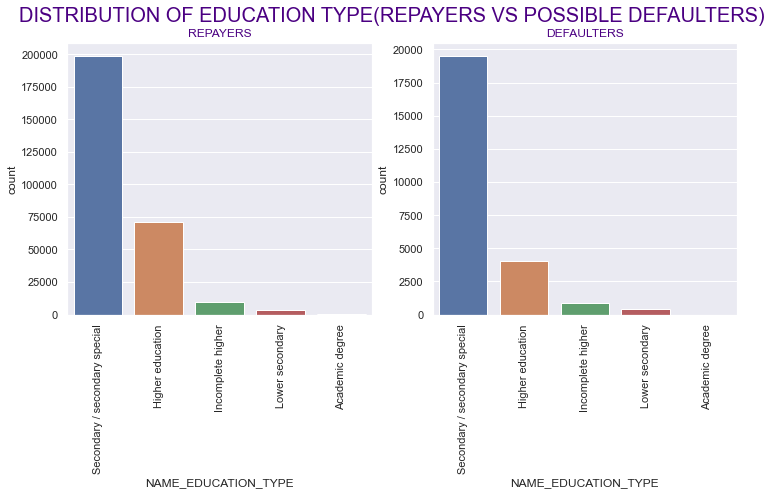

In [270]:

# UNIVARIATE ANALYSIS ON 'NAME_EDUCATION_TYPE'
plt.figure(figsize=(12,5))
plt.suptitle("DISTRIBUTION OF EDUCATION TYPE(REPAYERS VS POSSIBLE DEFAULTERS)",fontsize=20,color="indigo")
plt.subplot(1,2,1)
plt.title("REPAYERS",color="indigo")
sns.countplot(Repayers['NAME_EDUCATION_TYPE'],order = Repayers["NAME_EDUCATION_TYPE"].value_counts().index)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("DEFAULTERS",color="indigo")
sns.countplot(Defaulters['NAME_EDUCATION_TYPE'],order = Repayers["NAME_EDUCATION_TYPE"].value_counts().index)
plt.xticks(rotation=90)

plt.show()


#### OBSERVATIONS:
Most of the clients seem to have persuaded Secondary/Secondary Special Education, the least of them with Academic degree.

Clients with a Higher Education seem to be better Repayers and defaulting the loans less.




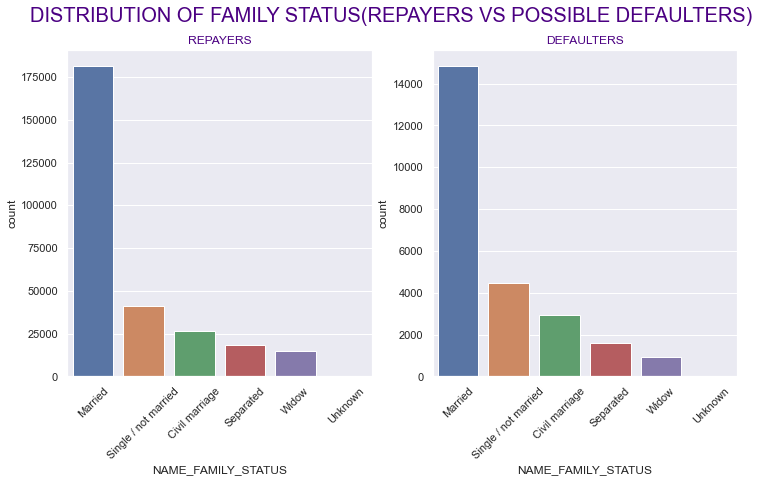

In [271]:
# UNIVARIATE ANALYSIS ON 'FAMILY STATUS'
plt.figure(figsize=(12,6))
plt.suptitle("DISTRIBUTION OF FAMILY STATUS(REPAYERS VS POSSIBLE DEFAULTERS)",fontsize=20,color="indigo")
plt.subplot(1,2,1)
plt.title("REPAYERS",color="indigo")
sns.countplot(Repayers['NAME_FAMILY_STATUS'],order = Repayers["NAME_FAMILY_STATUS"].value_counts().index)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title("DEFAULTERS",color="indigo")
sns.countplot(Defaulters['NAME_FAMILY_STATUS'],order = Repayers["NAME_FAMILY_STATUS"].value_counts().index)
plt.xticks(rotation=45)

plt.show()



#### OBSERVATION:

Most of the clients seem to belong to Married category in both Repayers as well as defaulters the least being Unknown followed by Widows.

Single / not Married, Civil Marriage and Separated category people seem to have problem in paying the loans, as can be observed from a shorter bar in Repayers graph vs a longer bar in defaulters, thus indicating more percentage of them being possible Defaulters. Widows seem to have a lower default rate.

Most of the clients Family status is known as can be inferred from a negligible at unknown category.


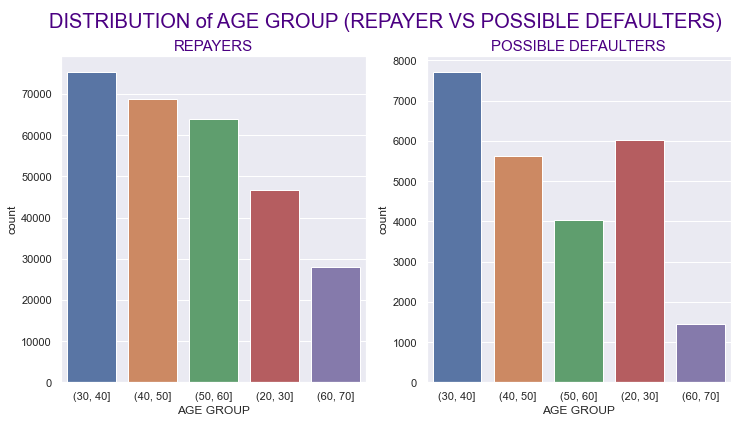

In [272]:
# UNIVARIATE ANALYSIS ON CATEGORIZED AGE GROUP
plot_count('AGE GROUP',"AGE GROUP")


#### Observation:

Most clients seem to belong to 30 to 40 age group in both Repayers as well as defaulters followed by 40 to 50 age group

Also, the graph clearly shows a bar proportionally higher in the defaulter graph compared to Repayers graph in people aged 20 to 30 indicating a strong default rate compared to others.

Older people belonging to 50 to 70 age group seems to be better Repayers and not defaulting on the loan.

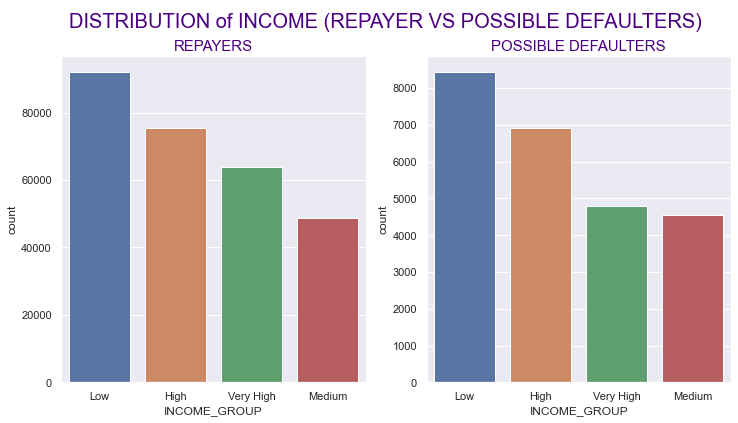

In [273]:
#DISTRIBUTION OF BINNED INCOME GROUP
plot_count('INCOME_GROUP',"INCOME")


#### OBSERVATION

Most Clients belong to Low-income binned category followed by High and Very High.

As inferred from the graph clients with very high income are low risk customers with lesser probability of default.


### BIVARIATE CATEGORICAL ANALYSIS:

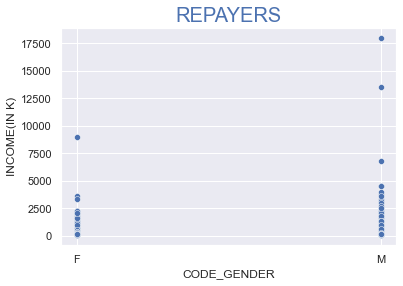

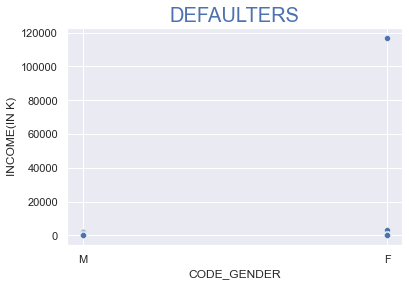

In [274]:
# Relation between gender and income(bivariate numeric vs categorical amalysis)

sns.scatterplot(data=Repayers,x="CODE_GENDER",y="INCOME(IN K)")
plt.title("REPAYERS",fontsize=20,c="b")
plt.show()
sns.scatterplot(data=Defaulters,x="CODE_GENDER",y="INCOME(IN K)")
plt.title("DEFAULTERS",fontsize=20,c="b")
plt.show()

#### OBSERVATION :

It is clear and evident that Males are earning more income compared to Females in Repayers. Most Female income is segregated up to 2500K whereas males at 5000K. There are some outliers and those seem to be more for Male category.

In Defaulters there is clearly an outlier at 117000k which needs to be further analysed. There is no big income difference observed between the two gender categories.



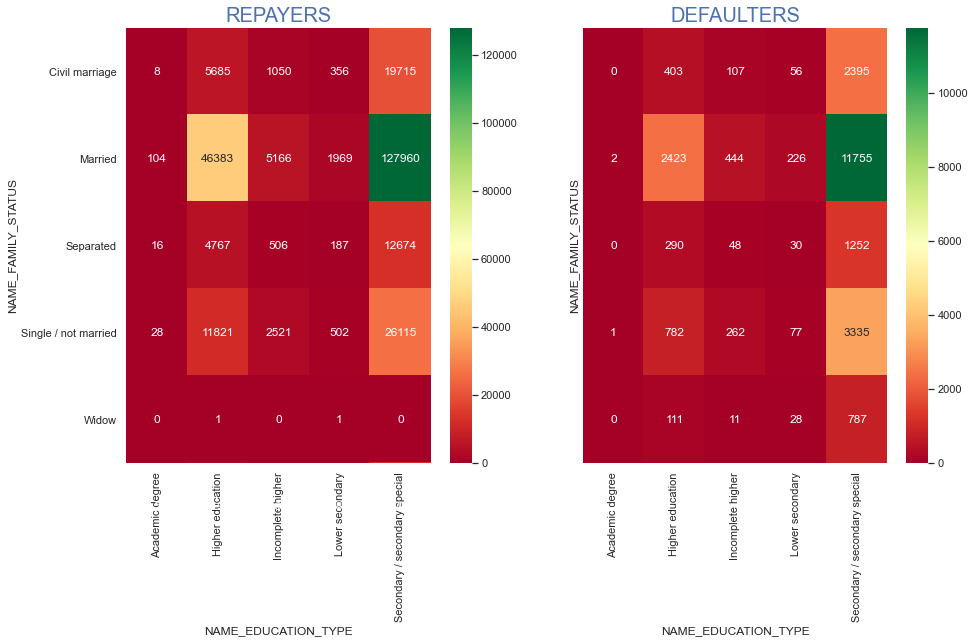

In [275]:
# Relation between FAMILY STATUS VS EDUCATION STATUS(categorical to categorical bivariate analysis)

#Creating pivot table for both Repayers and Defaulters with group by on NME_FAMILY_STATUS

pivot_R=pd.pivot_table(Repayers,index="NAME_FAMILY_STATUS",columns="NAME_EDUCATION_TYPE",values="TARGET",aggfunc="count",fill_value=0)
pivot_D=pd.pivot_table(Defaulters,index="NAME_FAMILY_STATUS",columns="NAME_EDUCATION_TYPE",values="TARGET",aggfunc="count",fill_value=0)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8),sharey=True)

#Plotting heatmap for Repayers
R=sns.heatmap(pivot_R,cmap="RdYlGn",annot=True,ax=ax1,fmt='d')
R.set_title("REPAYERS",fontsize=20,c="b")


#Plotting Heatmap for Defaulters

D=sns.heatmap(pivot_D,cmap="RdYlGn",annot=True,ax=ax2,fmt='d')
D.set_title("DEFAULTERS",fontsize=20,c="b")
plt.show()

#### OBSERVATION:

Most number of married clients from both Repayers and Defaulters seems to have pursued Secondary Education followed by Higher education. Also, the family status of some clients is unknown in repayers. Most number of clients with family status Unknown belong to Higher and Lower Secondary Education.

### STRUCTURE OF THE PREVIOUS APPLICATION DATA SET

In [276]:
# Check the first five rows using head() function
prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
# Check the number of rows and columns 

print("(Rows,Columns) :",prev_appl.shape)

(Rows,Columns) : (1670214, 37)


In [278]:
# Checking the data types and missing values column wise

prev_appl.info(max_cols=prev_appl.shape[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [279]:
# Null count and percentage of missing values of each column shown in a dataframe null_values in descending order

null_values=pd.DataFrame(prev_appl.isna().sum(),columns=["count"])
null_values["Percentage"]= round( (null_values["count"]*100/prev_appl.shape[0]), 2)
null_values.sort_values("Percentage",ascending=False)

,count,Percentage
RATE_INTEREST_PRIVILEGED,1664263,99.64
RATE_INTEREST_PRIMARY,1664263,99.64
RATE_DOWN_PAYMENT,895844,53.64
AMT_DOWN_PAYMENT,895844,53.64
NAME_TYPE_SUITE,820405,49.12
NFLAG_INSURED_ON_APPROVAL,673065,40.30
DAYS_FIRST_DRAWING,673065,40.30
DAYS_FIRST_DUE,673065,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,40.30
DAYS_LAST_DUE,673065,40.30


In [280]:
# Creating a dataframe prev_appl2 by dropping the attributes where null % > 40 ,
# as they seem to have limited significance in the present analysis.

non_null_cols=null_values[null_values["Percentage"] <= 40].index.tolist()
prev_appl2= prev_appl[non_null_cols]

# Checking the changes made by di
print("Shape of the Data Frame after dropping columns:", prev_appl2.shape)

Shape of the Data Frame after dropping columns: (1670214, 26)


### DEALING WITH MISSING VALUES AND OUTLIERS

In [281]:
#Get all the numeric columns and descriptions
numeric_cols=[col for col in prev_appl2.columns if prev_appl2[col].dtypes!='O']
prev_appl2[numeric_cols].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [282]:
# For a better visualization storing the Amount related values in thousands in new columns
new_col_list=["LOAN ANNUITY(IN K)","APPLN CREDIT(IN K)","LOAN CREDIT(IN K)","GOODS PRICE(IN K)"]
col_to_edit=prev_appl2[["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]]
for x,y in zip(new_col_list,col_to_edit) :
    prev_appl2[x]=round((prev_appl2[y]/1000),2)
    prev_appl2.drop(y,axis=1,inplace=True)

# Checking the new columns data:
prev_appl2[["LOAN ANNUITY(IN K)","APPLN CREDIT(IN K)","LOAN CREDIT(IN K)","GOODS PRICE(IN K)"]].describe()

,LOAN ANNUITY(IN K),APPLN CREDIT(IN K),LOAN CREDIT(IN K),GOODS PRICE(IN K)
count,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06
mean,1.595513e+01,1.752341e+02,1.961141e+02,2.278476e+02
std,1.478211e+01,2.927797e+02,3.185746e+02,3.153964e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.320000e+00,1.872000e+01,2.416000e+01,5.084000e+01
50%,1.125000e+01,7.105000e+01,8.054000e+01,1.123200e+02
75%,2.066000e+01,1.803600e+02,2.164200e+02,2.340000e+02
max,4.180600e+02,6.905160e+03,6.905160e+03,6.905160e+03


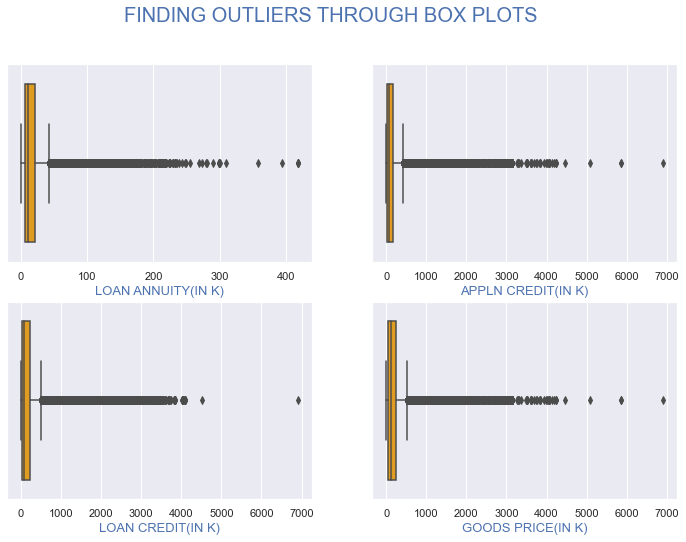

In [283]:
#Plotting box plots to find outliers in the Amount columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

fig.suptitle('FINDING OUTLIERS THROUGH BOX PLOTS',fontsize=20,color="b")

sns.boxplot(ax=axes[0, 0], data=prev_appl2, x='LOAN ANNUITY(IN K)',color="orange")
axes[0][0].set_xlabel("LOAN ANNUITY(IN K)",fontsize=13 ,color="b")
sns.boxplot(ax=axes[0, 1], data=prev_appl2, x='APPLN CREDIT(IN K)',color="orange")
axes[0][1].set_xlabel("APPLN CREDIT(IN K)",fontsize=13 ,color="b")
sns.boxplot(ax=axes[1,0], data=prev_appl2, x='LOAN CREDIT(IN K)',color="orange")
axes[1][0].set_xlabel("LOAN CREDIT(IN K)",fontsize=13 ,color="b")
sns.boxplot(ax=axes[1, 1], data=prev_appl2, x='GOODS PRICE(IN K)',color="orange")
axes[1][1].set_xlabel("GOODS PRICE(IN K)",fontsize=13 ,color="b")
plt.show()

In [284]:
# Looking through the summary of the above columns for a better insight

prev_appl2[["LOAN ANNUITY(IN K)","APPLN CREDIT(IN K)","LOAN CREDIT(IN K)","GOODS PRICE(IN K)"]].describe()

,LOAN ANNUITY(IN K),APPLN CREDIT(IN K),LOAN CREDIT(IN K),GOODS PRICE(IN K)
count,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06
mean,1.595513e+01,1.752341e+02,1.961141e+02,2.278476e+02
std,1.478211e+01,2.927797e+02,3.185746e+02,3.153964e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.320000e+00,1.872000e+01,2.416000e+01,5.084000e+01
50%,1.125000e+01,7.105000e+01,8.054000e+01,1.123200e+02
75%,2.066000e+01,1.803600e+02,2.164200e+02,2.340000e+02
max,4.180600e+02,6.905160e+03,6.905160e+03,6.905160e+03


#### OBSERVATIONS:

As observed from the box plots and the summary there are outliers in LOAN_ANNUITY, APPLN CREDIT, LOAN CREDIT and GOODS PRICE. These values need to be further analysed and can be dealt with:

1.Either by imputing them with median. 
2.capping the columns on basis of quartiles.



In [285]:
#Converting all the negative values in  DAYS DECISION to positive and converting the days to years.Changing the data type to "INT"
# As age cannot be in float values

prev_appl2["DECISION AGE"]=(prev_appl2["DAYS_DECISION"].abs()/365).astype("int")
prev_appl2["DECISION AGE"].head()

0    0
1    0
2    0
3    1
4    2
Name: DECISION AGE, dtype: int32

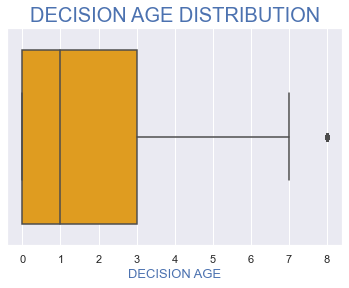

In [286]:
#Plotting box plot to find outliers in the DECISION AGE column
figsize=(12, 6)
plt.title("DECISION AGE DISTRIBUTION",fontsize=20,color="b")
plt.xlabel("\nDECISION AGE",fontsize=13,color="b")
sns.boxplot(prev_appl2["DECISION AGE"],color="orange")
plt.show()

#### OBSERVATION:

As observed from the plot the records with 8 years are being treated as outliers due their high variance from the mean of actual data. These values can be imputed with median for a better analysis.

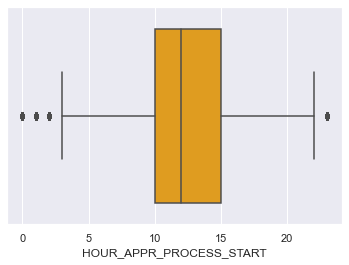

In [287]:
#Plotting sub plots to find outliers in the columns HOUR_APPR_PROCESS_START

sns.boxplot(data=prev_appl2, x='HOUR_APPR_PROCESS_START',color="orange")

plt.show()

#### OBSERVATION:

Most of the applications are being applied between morning 10 to evening 3 (Banking working Hours), some of them are being applied online and the time does not correspond to the banking hours so they are being plotted as outliers when compared to the actual data.

We can infer that many clients wish to apply directly through Bank rather than online.



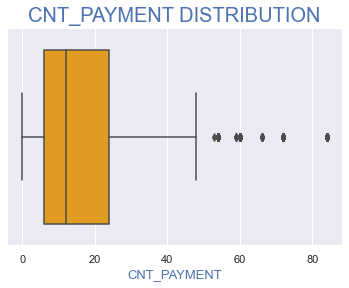

In [288]:
#Plotting box plot to find outliers in the CNT_PAYMENT column

figsize=(12, 6)
plt.title("CNT_PAYMENT DISTRIBUTION",fontsize=20,color="b")
plt.xlabel("\nCNT_PAYMENT",fontsize=13,color="b")
sns.boxplot(prev_appl2["CNT_PAYMENT"],color="orange")
plt.show()

#### OBSERVATION : 

Most of the data lies below 45 .There are some outliers due to high variance from the mean.

In [289]:
#Get all the Object data type columns and thier unique values to identify if there are any duplicates or junk values
obj_cols=[col for col in prev_appl2.columns if prev_appl2[col].dtypes=='O']
for col in obj_cols:
    print(col,":\n",prev_appl2[col].unique(),"\n")

NAME_CONTRACT_TYPE :
 ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA'] 

WEEKDAY_APPR_PROCESS_START :
 ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY'] 

FLAG_LAST_APPL_PER_CONTRACT :
 ['Y' 'N'] 

NAME_CASH_LOAN_PURPOSE :
 ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person'] 

NAME_CONTRACT_STATUS :
 ['Approved' 'Refused' 'Canceled' 'Unused offer'] 

NAME_PAYMENT_TYPE :
 ['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer'] 

CODE_REJECT_REASON :
 ['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA

### OBSERVATIONS:

NAME_CASH_LOAN_PURPOSE has some junk values like XNA and XAP

NAME_PAYMENT_TYPE has a junk value XNA

CODE_REJECT_REASON has junk values like XNA and XAP

NAME_CLIENT_TYPE has a junk value XNA

NAME_PRODUCT_TYPE has a junk value XNA

NAME_SELLER_INDUSTRY has a junk value XNA

NAME_YIELD_GROUP has a junk value XNA

PRODUCT_COMBINATION has a junk value XNA 

All the above junk values can be dropped as they wont make any sense.

## MERGING CURRENT APPLICATION DATA WITH PREVIOUS APPLICATION

In [290]:
# Merging the curr_appl2 with prev_appl on columns SK_ID_CURR,NAME_CONTRACT_TYPE by performing an inner merge

curr_prev= curr_appl2.merge(prev_appl2,on=["SK_ID_CURR","NAME_CONTRACT_TYPE"],how="inner")
curr_prev.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT AGE(IN YRS),EMPLOYMENT AGE(IN YRS),REGISTRATION AGE(IN YRS),IDENTITY AGE(IN YRS),CLIENT PHONE AGE(IN YRS),INCOME(IN K),LOAN CREDIT(IN K)_x,LOAN ANNUITY(IN K)_x,GOODS PRICE(IN K)_x,ASSETS,INCOME_GROUP,AGE GROUP,SK_ID_PREV,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,LOAN ANNUITY(IN K)_y,APPLN CREDIT(IN K),LOAN CREDIT(IN K)_y,GOODS PRICE(IN K)_y,DECISION AGE
0,100003,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2,tier 1,tier 1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,3,3,0,2,270.0,1293.50,35.70,1129.5,No ASSETS,Very High,"(40, 50]",1810518,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,98.36,900.0,1035.88,900.0,2
1,100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2,tier 2,tier 2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,8,26,6,1,135.0,312.68,29.69,297.0,House,Medium,"(50, 60]",2078043,THURSDAY,15,Y,1,XNA,Approved,-181,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low,24.25,675.0,675.00,675.0,0
2,100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2,tier 2,tier 2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,8,26,6,1,135.0,312.68,29.69,297.0,House,Medium,"(50, 60]",1020698,SATURDAY,12,Y,1,XNA,Approved,-438,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,high,Cash X-Sell: high,39.95,454.5,481.50,454.5,1
3,100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2,tier 2,tier 2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,8,26,6,1,135.0,312.68,29.69,297.0,House,Medium,"(50, 60]",1243599,THURSDAY,15,Y,1,XNA,Canceled,-181,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,0.0,0.00,NaN,0
4,100006,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / seconda

In [291]:
# Displaying the shape of curr_prev

curr_prev.shape

(596876, 101)

In [292]:
# Null value count and percentages in the merged data frame--curr_prev

null_values1=pd.DataFrame(curr_prev.isna().sum(),columns=["count"])
null_values1["Percentage"]= round( (null_values1["count"]*100/curr_prev.shape[0]), 2)
null_values1.sort_values("Percentage",ascending=False)

,count,Percentage
LOAN ANNUITY(IN K)_y,223286,37.41
CNT_PAYMENT,223286,37.41
GOODS PRICE(IN K)_y,222886,37.34
INCOME_GROUP,5727,0.96
SK_ID_CURR,0,0.00
AMT_REQ_CREDIT_BUREAU_YEAR,0,0.00
GOODS PRICE(IN K)_x,0,0.00
LOAN ANNUITY(IN K)_x,0,0.00
LOAN CREDIT(IN K)_x,0,0.00
INCOME(IN K),0,0.00


### UNIVARITAE ANALYSIS

In [ ]:
# Plotting the distribution of CHANNEL_TYPE 
plt.figure(figsize=(15,6))
sns.countplot(curr_prev["CHANNEL_TYPE"])
plt.show()

#### OBSERVATIONS:
Most clients are being acquired through credit and cash office followed by Contact centre.
There are minimal customers being acquired through Car dealers.


In [ ]:
# plotting the CHANNEL TYPE

plt.figure(figsize=(12,6))
sns.countplot(curr_prev["NAME_CONTRACT_STATUS"])
plt.show()


##### Observations:
Most of the loans are being approved by the bank; also many customers are cancelling the loans at some point of approval. There are very few clients who have unused the offer.


### BIVARIATE ANALYSIS

In [ ]:
### CLIENT LOAN ANNUITY VS CONTRACT STATUS

sns.scatterplot(y="INCOME(IN K)",x="NAME_CONTRACT_STATUS",data=curr_prev)
plt.show()


#### OBSERVATION :

All the unused offers are below 1000k. Income of clients is almost equally distributed among Approved, Cancelled and Refused.

In [ ]:
#Grouping the curr_prev over Occupation type and Contract Status
pivotO=pd.pivot_table(curr_prev,index="OCCUPATION_TYPE",columns="NAME_CONTRACT_STATUS",values="TARGET",aggfunc="count",fill_value=0)
pivotO

In [ ]:
# Occupation Type vs Contract status
plt.figure(figsize=(10,10))
plt.title("OCCUPATION VS CONTRACT STATUS",fontsize=20,c="b")
sns.heatmap(pivotO,cmap="Greens",annot=True,fmt="d")
plt.show()

#### OBSERVATION:
Most of the applicants from all categories of Contract type belong to Laborers followed by Sales Staff and Core Staff.

In [ ]:
# Grouping the curr_prev over Eductaion Type and Contract Status

pivotE=pd.pivot_table(curr_prev,index="NAME_EDUCATION_TYPE",columns="NAME_CONTRACT_STATUS",values="TARGET",aggfunc="count",fill_value=0)
pivotE

In [ ]:
#Education type vs Contract status
plt.figure(figsize=(8,8))
plt.title("EDUCATION vs CONTRACT STATUS",fontsize=20,c="b")
sns.heatmap(pivotE,cmap="Greens",annot=True,fmt="d")
plt.yticks(rotation=45)
plt.show()

#### OBSERVATION :

Clients with Secondary Education are being approved more loans followed by Higher education. Most of the loans being cancelled belong to Secondary education group as well.

Clients with academic degree are least in all the categories of loan contracts.


In [ ]:
## Compare CHANNEL TYPE VS CONTRACT STATUS 

pivotC=pd.pivot_table(curr_prev,index="CHANNEL_TYPE",columns="NAME_CONTRACT_STATUS",values="TARGET",aggfunc="count",fill_value=0)
plt.figure(figsize=(8,8))
plt.title("CHANNEL vs CONTRACT STATUS",fontsize=20,c="b")
sns.heatmap(pivotC,cmap="Greens",annot=True,fmt="d")
plt.yticks(rotation=45)
plt.show()


#### OBSERVATION:
Most of the loans being Approved are being channeled through credit and cash offices followed by country wide and AP+(cash loan)

### END OF CASE STUDY

